# 123.05: Constant pumping in a confined aquifer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ttim

from bruggeman.flow1d import bruggeman_123_05_q

View the function (this will be rendered in LaTeX if `latexify-py` is installed).

In [2]:
bruggeman_123_05_q

View the docstring to get a description of the input parameters.

In [7]:
help(bruggeman_123_05_q)

Help on LatexifiedFunction in module latexify.ipython_wrappers:

bruggeman_123_05_q = <latexify.ipython_wrappers.LatexifiedFunction object>
    Solution for constant infiltration/pumping in a confined aquifer.

    From Olsthoorn, Th. 2006. Van Edelman naar Bruggeman. Stromingen 12 (2006) p5-11.

    Parameters
    ----------
    x : float
        Distance from the boundary [m]
    t : float
        Time since the start of the rise [d]
    Q : float
        Infiltration (positive) or pumping (negative) rate [m^3/d]
    k : float
        Hydraulic conductivity [m/d]
    D : float
        Aquifer thickness [m]
    S : float
        Storage coefficient [-]

    Returns
    -------
    head : float
        head in the aquifer at distance x and time t [m]



Define some aquifer parameters.

In [4]:
k = 5.0  # m/d, hydraulic conductivity
D = 10.0  # m  # thickness aquifer
Ss = 1e-3 / D  # m^-1, specific storage coeffecient
Q = 2.0  # m^3/d, positive Q here means pumping in TTim

Set up a `ttim` model.

In [5]:
mlconf = ttim.ModelMaq(
    kaq=k, z=[0, -D], Saq=Ss, tmin=1e-3, tmax=1e3, topboundary="conf"
)
ls = ttim.DischargeLineSink1D(mlconf, tsandq=[(0, Q)], layers=[0])
mlconf.solve()

self.neq  0
No unknowns. Solution complete


Compare `ttim` implementation to the analytical solution

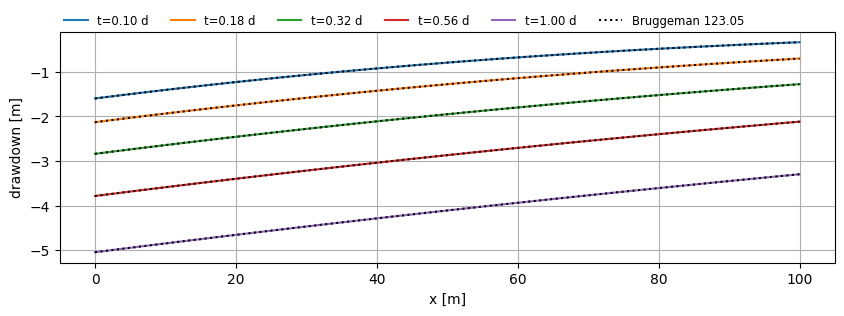

In [6]:
x = np.linspace(0, 100, 101)
y = np.zeros_like(x)
t = np.logspace(-1, 0, 5)

plt.figure(figsize=(10, 3))
for i in range(len(t)):
    h = mlconf.headalongline(x, y, t[i])
    plt.plot(x, h.squeeze(), label=f"t={t[i]:.2f} d")
    ha = bruggeman_123_05_q(x, t[i], -Q / 2, k, D, Ss * D)  # Q/2 because 2-sided flow
    plt.plot(x, ha, "k:")
plt.plot([], [], "k:", label="Bruggeman 123.05")
plt.legend(loc=(0, 1), frameon=False, ncol=6, fontsize="small")
plt.xlabel("x [m]")
plt.ylabel("drawdown [m]")
plt.grid()